## Handwritten Digits Prediction
PRCP-1002-HandwrittenDigits

## Task 1:-Prepare a complete data analysis report on the given data.

The **MINST** dataset stands for **“Modified National Institute of Standards and Technology“**. The dataset contains a large collection of handwritten digits that is commonly used for training various image processing systems. The dataset was created by re-mixing samples from NIST’s original datasets, which were taken from American Census Bureau employees and high school students. It is designed to help scientists develop and test machine learning algorithms in pattern recognition and machine learning. It contains 60,000 training images and 10,000 testing images, each of which is a grayscale image of size 28×28 pixels.

**Structure of MNIST dataset**

The MNIST dataset is a collection of 70,000 handwritten digits (0-9), with each image being 28×28 pixels. Here is the dataset information in the specified format:

**Number of Instances:** 70,000 images

**Number of Attributes:** 784 (28×28 pixels)

**Target:** Column represents the digit (0-9) corresponding to the handwritten image

**Pixel 1-784:** Each pixel value (0-255) represents the grayscale intensity of the corresponding pixel in the image.

The dataset is divided into two main subsets:

- **Training Set:** Consists of 60,000 images along with their labels, commonly used for training machine learning models.

- **Test Set:** Contains 10,000 images with their corresponding labels, used for evaluating the performance of trained models.

**Applications of MNIST**

While it’s primarily used for educational purposes and in benchmarking algorithms in academic studies, learning and experimenting with the MNIST dataset can also have practical applications. MNIST dataset finds applications in the Banking Sector, Postal Services, and Document Management:

**Banking Sector**

Recognizing Handwritten Numbers on Checks: The banks are primarily responsible for this role, namely, cashing the checks. MNIST is the core of training numerical recognition systems in classifying the digits to identify the ones or the amount on a check. Thus, this removes data entry, eliminates error, and expedites check handling.

**Postal Services**

Automating Postal Code Reading: Accurate parcel sorting and timely postal delivery depend a lot on proper recognition of a postal code. The MNIST data set is used to train an image recognition model recognizing zip codes on envelopes regardless of varied hand writing quality and print quality. This results in the rapid links of the sorting and postage which would ultimately facilitate fast delivery hence reducing delays.

**Document Management**

Digitizing Written Documents and Recognizing Numbers: A lot of them have handwriting numbers too; these are the invoices, receipts, and forms. MNIST can be applied in developing such systems that can perform operations like extracting and recognizing those figures during the scan and digitization process. The benefits of data entry automation are the opportunities to streamline the process, simplify the data mining, and increase the documents searchability.

## Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9

Imporing the neccessary modules.

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

downloading and assigning the train and test data accordingly

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Printing the shapes of the train and test data

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Printing some of the images to just check.

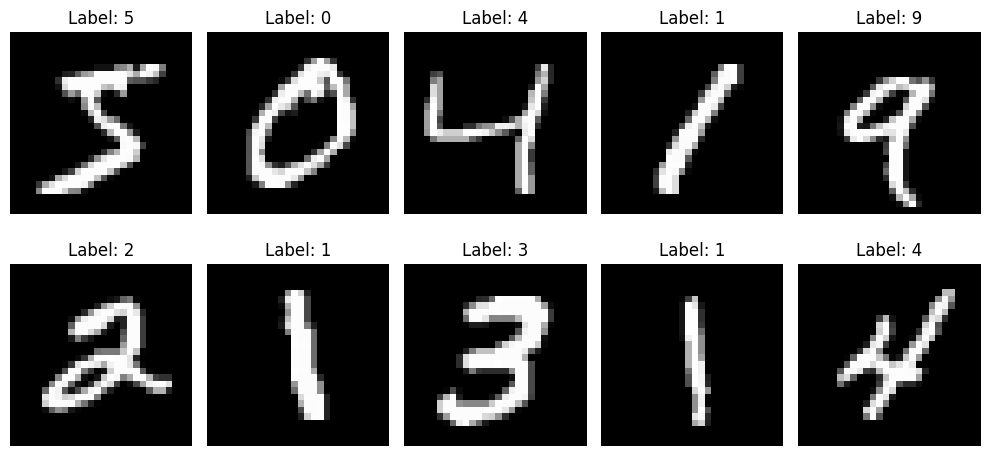

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Printing size, shape, number of dimesions, data types of the data to understand, it helps in analyzing and handling the data.

In [5]:
print(x_train[0].size)
print(x_train[0].ndim)
print(x_test.size)
print(x_test.ndim)
print(x_train.shape)
print(x_train.dtype)
# x_train[1].reshape(28, 28)

784
2
7840000
3
(60000, 28, 28)
uint8


Reshaping and converting the data into float and normalizing the data range from 0 to 1, since the data ranges between 1 to 255

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Conveting 3D to 2D, since the Machine Learning Models can't handle 3 dimensional data

In [7]:
x_train_new = x_train.reshape((-1, 28*28))
x_test_new = x_test.reshape((-1, 28*28))

print(x_train_new.shape)
print(x_train_new.shape)

(60000, 784)
(60000, 784)


Importing the Libraries to build Modles

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Model Building

Support Vector Machine - Building SVC (support vector classifier)

In [9]:
svc = SVC()
svc.fit(x_train_new, y_train)

SVC()

Predicting and evaluating unseen data that is x test.

In [10]:
y_hat = svc.predict(x_test_new)

Checking the accuracy of the prediction, to varify if the model is doing good or bad.

In [11]:
accuracy_score(y_test, y_hat)

0.9792

In [12]:
f1_score(y_test, y_hat, average='macro')

0.9791298259748042

In [13]:
y_test.shape

(10000,)

In [14]:
# unique count values for each class

import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
for i in range(len(unique)):
  print(f"Class {unique[i]}: {counts[i]} values")


Class 0: 980 values
Class 1: 1135 values
Class 2: 1032 values
Class 3: 1010 values
Class 4: 982 values
Class 5: 892 values
Class 6: 958 values
Class 7: 1028 values
Class 8: 974 values
Class 9: 1009 values


In [15]:
import pandas as pd

pd.crosstab(y_test, y_hat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,0,1,0,0,2,1,1,2,0
1,0,1126,3,1,0,1,1,1,2,0
2,6,1,1006,2,1,0,2,7,6,1
3,0,0,2,995,0,2,0,5,5,1
4,0,0,5,0,961,0,3,0,2,11
5,2,0,0,9,0,871,4,1,4,1
6,6,2,0,0,2,3,944,0,1,0
7,0,6,11,1,1,0,0,996,2,11
8,3,0,2,6,3,2,2,3,950,3


Checking if the predicted class and actual class are same.

In [16]:
print("Predicted Class for 0th and 10th: ", y_hat[0], ",", y_hat[10])
print("Actual Class 0th and 10th: ", y_test[0], ",", y_test[10])

Predicted Class for 0th and 10th:  7 , 0
Actual Class 0th and 10th:  7 , 0


K-Nearest Neighbor - Model

In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train_new, y_train)

KNeighborsClassifier()

Predicting for test dataset.

In [18]:
y_hat_knn = knn.predict(x_test_new)

Checking the accuracy and f1 Score for evaluating the model's performance.

In [19]:
accuracy_score(y_test, y_hat_knn)

0.9688

In [20]:
f1_score(y_test, y_hat_knn, average='macro')

0.9687143421292884

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Pring few results predicted and actual classes to verify the model.

In [22]:
print(y_test[3], y_hat_knn[3])

0 0


In [23]:
pd.crosstab(y_test, y_hat_knn)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,11,8,991,2,1,0,1,15,3,0
3,0,3,3,976,1,13,1,6,3,4
4,3,7,0,0,944,0,4,2,1,21
5,5,0,0,12,2,862,4,1,2,4
6,5,3,0,0,3,2,945,0,0,0
7,0,22,4,0,3,0,0,988,0,11
8,8,3,5,13,6,12,5,5,913,4


In [24]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Saving the Labels

In [25]:
mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Checking the test dataset shape.

In [26]:
x_test.shape

(10000, 28, 28, 1)

Printing the predicted and actual label images.

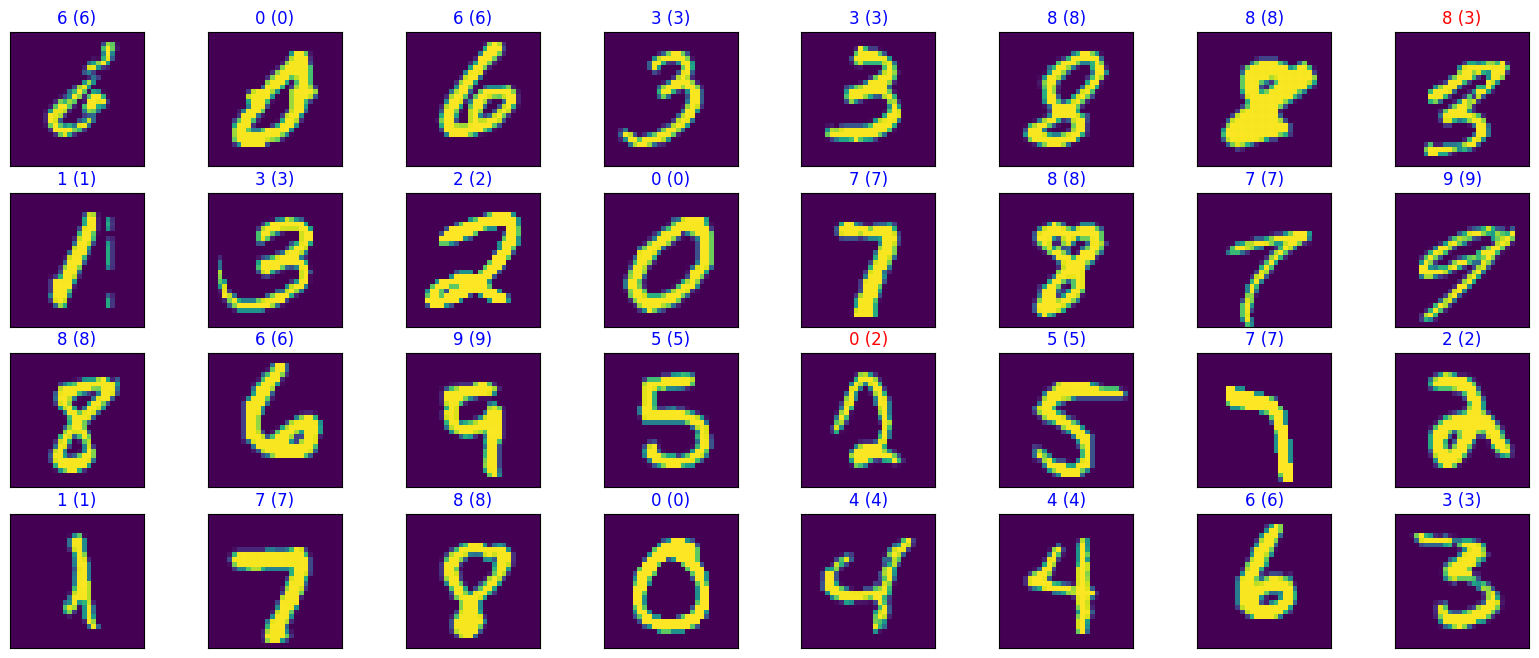

In [27]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8)) #Canvas
for idx, i in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    #print(idx,i)
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))
    pred_i = y_hat[i] #predicted
    true_i = y_test[i] #Actual
    ax.set_title("{} ({})".format(mnist[pred_i], mnist[true_i]),
                 color=("blue" if pred_i == true_i else "red"))

## Building CNN Model

Loading the data again to build convolutional network, and get more information of the data like class names.

In [28]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data as supervised dataset, that helps extract the classes of a data

In [29]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Extracting classes

In [30]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Splitting the data into train and test and printing the size of the datasets.

In [31]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [32]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time we use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [33]:
type(num_train_examples)

int

In [34]:
validation_split = 0.2  # 80% for training, 20% for validation
split = int(num_train_examples * validation_split)
print(num_train_examples)
validation_split = train_dataset.take(split)
train_split = train_dataset.skip(0.65)
test_splt = test_dataset.skip(split)

60000


In [35]:
# # Batching the validation, training and testing set
validation_split = validation_split.batch(128)
train_split = train_split.shuffle(num_train_examples).batch(128)
# test_dataset = test_dataset.batch(128)

In [36]:
print(train_split.element_spec)
print(validation_split.element_spec)
print(test_dataset.element_spec)

(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


Printing few images to just see how they are.

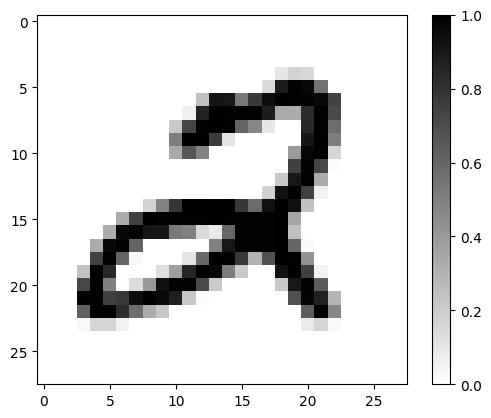

In [37]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Printing aroung 25 images.

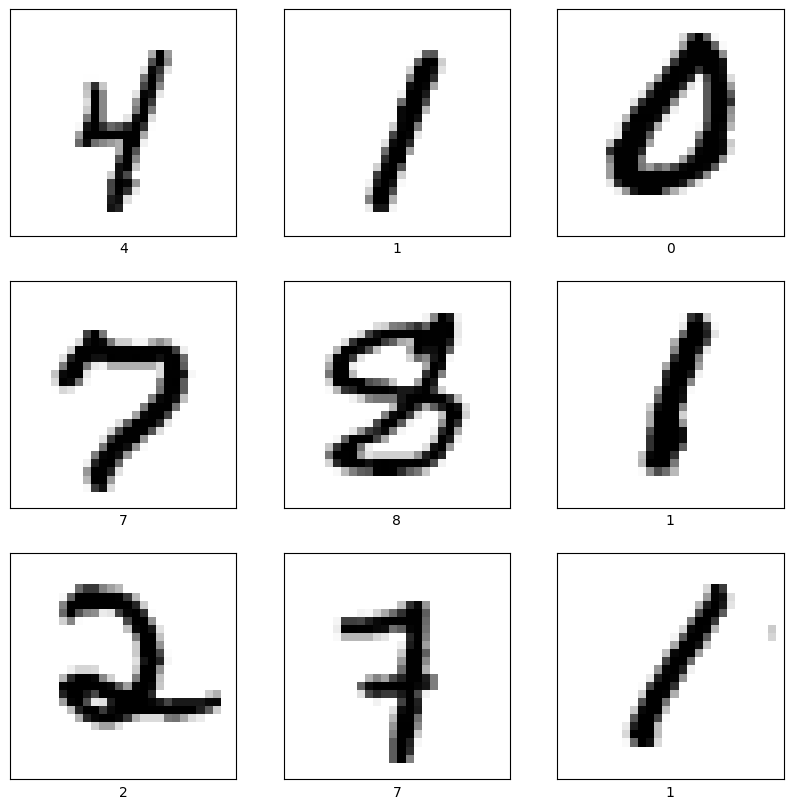

In [38]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(9)):
    image = image.numpy().reshape((28,28))
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

Data is divided into batches of 128 samples each. Batching helps in managing memory usage and speeds up the training process. Instead of processing the entire dataset at once, the model processes smaller chunks of data sequentially.

Now that we have rescaled the data and divided them into batches, we build CNN Model

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Compiling the model

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(train_split,
                    validation_data=validation_split ,
                    epochs=10,
                    verbose=2)


Epoch 1/10
375/375 - 13s - 33ms/step - accuracy: 0.9360 - loss: 0.2236 - val_accuracy: 0.9763 - val_loss: 0.0811
Epoch 2/10
375/375 - 1s - 4ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9803 - val_loss: 0.0669
Epoch 3/10
375/375 - 1s - 4ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 4/10
375/375 - 1s - 4ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9879 - val_loss: 0.0417
Epoch 5/10
375/375 - 1s - 4ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9890 - val_loss: 0.0435
Epoch 6/10
375/375 - 1s - 4ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9865 - val_loss: 0.0476
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9892 - val_loss: 0.0389
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9884 - val_loss: 0.0468
Epoch 9/10
375/375 - 2s - 6ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9883 - val_loss: 0.0515

In [43]:
test, accuracy = model.evaluate(test_dataset.batch(128), verbose=2)

79/79 - 1s - 18ms/step - accuracy: 0.9892 - loss: 0.0378


In [44]:
print('Accuracy on test dataset:', accuracy)

Accuracy on test dataset: 0.9891999959945679


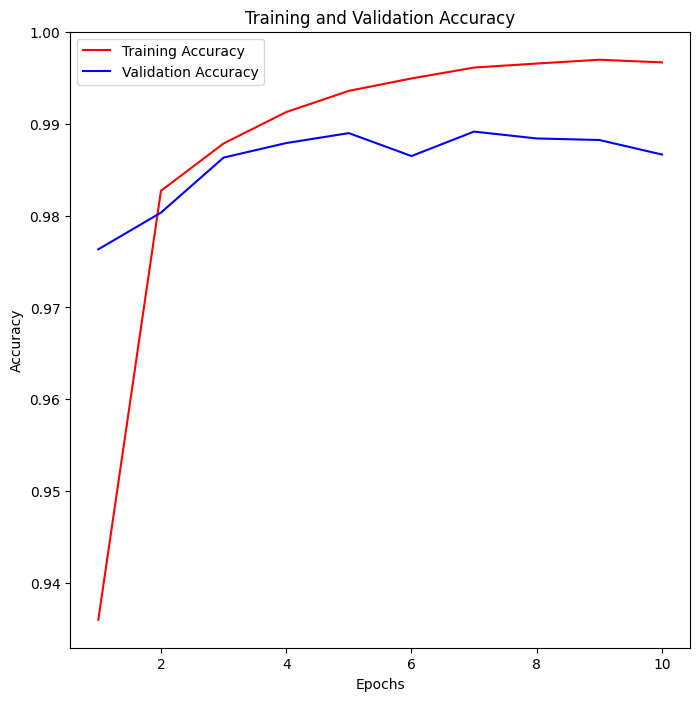

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.show()

In above figure we can find that, the accuracy for the train dataset is reaching almost 100%, but the validation set is stopping around 99%, it clearly shows that the model is overfitting.

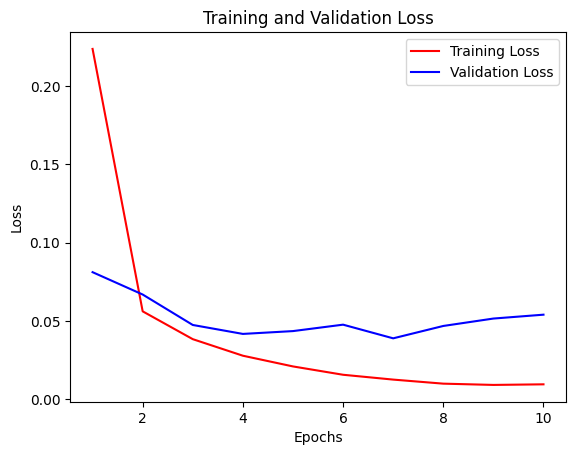

<Figure size 640x480 with 0 Axes>

In [46]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.figure()
plt.show()

Here, in the above figure the training loss is zero and validation loss is around 0.05, it has same loss from 4 to 10 epochs. It clearly shows that the model is not Generalized model.

To overcome this problem, we can take few steps.

- Early stopping
- Normalization (Batch Normalization)
- Transfer Learning
- Regularization
- Drop Out Method
- Data Augmentation

Predicting classes for test dataset.

In [47]:
y_hat = model.predict(test_dataset.batch(128))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Printing the shape of y_hat

In [48]:
print(y_hat.shape)

(10000, 10)


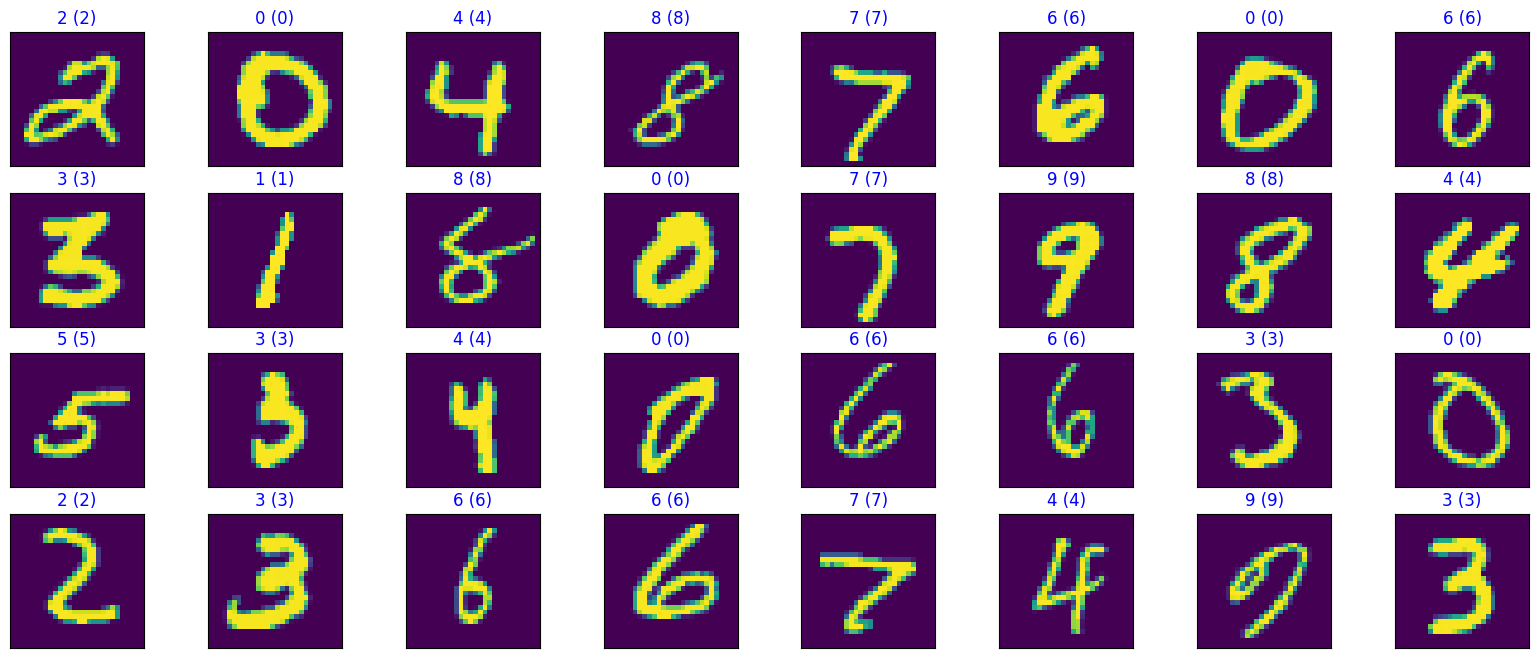

In [49]:
# visualizing 32 images against predicted and actual

import matplotlib.pyplot as plt
import numpy as np
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8)) #Canvas
# for idx, i in enumerate(np.random.choice(, size=32, replace=False)):
for i, (image, label) in enumerate(test_dataset.take(32)):
    #print(idx,i)
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(image))
    pred_i = np.argmax(y_hat[i]) #predicted
    true_i = label.numpy() #Actual
    ax.set_title("{} ({})".format(int(class_names[pred_i]), int(class_names[true_i])),
                 color=("blue" if pred_i == true_i else "red"))


So, Here we are going to use few methods which were mentioned earlier to see if the model Generalizes this time.

- Early Stopping
- Dropout Method
- Regularization

In [50]:
model_new = tf.keras.Sequential()
model_new.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer='l2', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)))
model_new.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
model_new.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer='l2', activation=tf.nn.relu))
model_new.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
model_new.add(tf.keras.layers.BatchNormalization())
model_new.add(tf.keras.layers.Flatten())
model_new.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_new.add(tf.keras.layers.Dropout(0.2))
model_new.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In the above model Building, we are using
- Batch Normalization - to normalize the data batch wise
- Early Stopping - Stopping the training - only 5 Epochs
- Dropout Method - Dropping 20% of the layer outputs during training.
- Regularization - regularizing the data using l2 regularizer


Compiling the Model

In [51]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Printing the Summary of the model, it helps us to keep track of the sizes and layers, parameters etc

In [52]:
model_new.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,898 (1.61 MB)

 Trainable params: 421,770 (1.61 MB)

 Non-trainable params: 128 (512.00 B)

Training the Model.

In [53]:
history = model_new.fit(train_split,
                    validation_data=validation_split ,
                    epochs=5,
                    verbose=2)

Epoch 1/5
375/375 - 7s - 18ms/step - accuracy: 0.9486 - loss: 0.3727 - val_accuracy: 0.9813 - val_loss: 0.6512
Epoch 2/5
375/375 - 2s - 4ms/step - accuracy: 0.9833 - loss: 0.1062 - val_accuracy: 0.9852 - val_loss: 0.0926
Epoch 3/5
375/375 - 3s - 7ms/step - accuracy: 0.9864 - loss: 0.0735 - val_accuracy: 0.9722 - val_loss: 0.1150
Epoch 4/5
375/375 - 3s - 7ms/step - accuracy: 0.9883 - loss: 0.0597 - val_accuracy: 0.9807 - val_loss: 0.0829
Epoch 5/5
375/375 - 2s - 4ms/step - accuracy: 0.9896 - loss: 0.0544 - val_accuracy: 0.9870 - val_loss: 0.0642


In [ ]:
# tf.keras.utils.plot_model(model_new, show_shapes=True)

Predicting the classes for the training data

In [54]:
y_hat_new = model_new.predict(test_dataset.batch(128))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

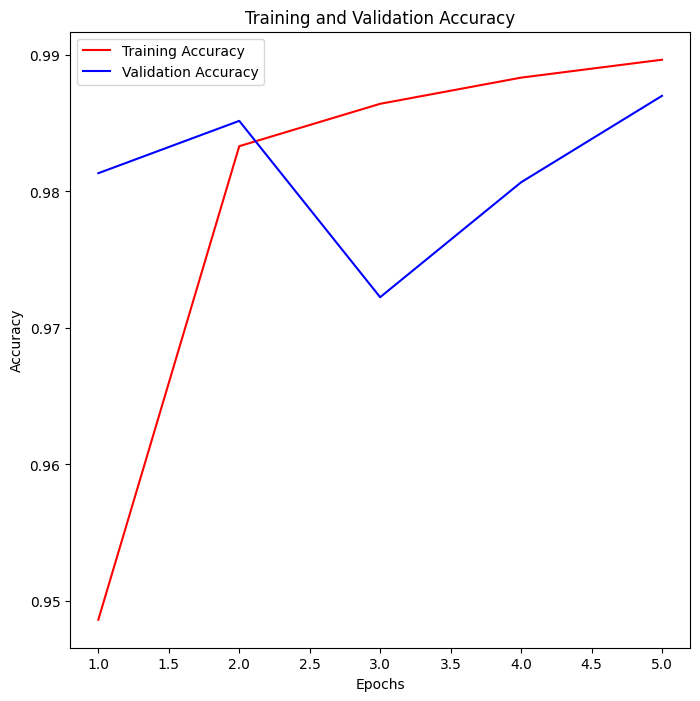

In [56]:
# plotting against train, validation accuracy

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

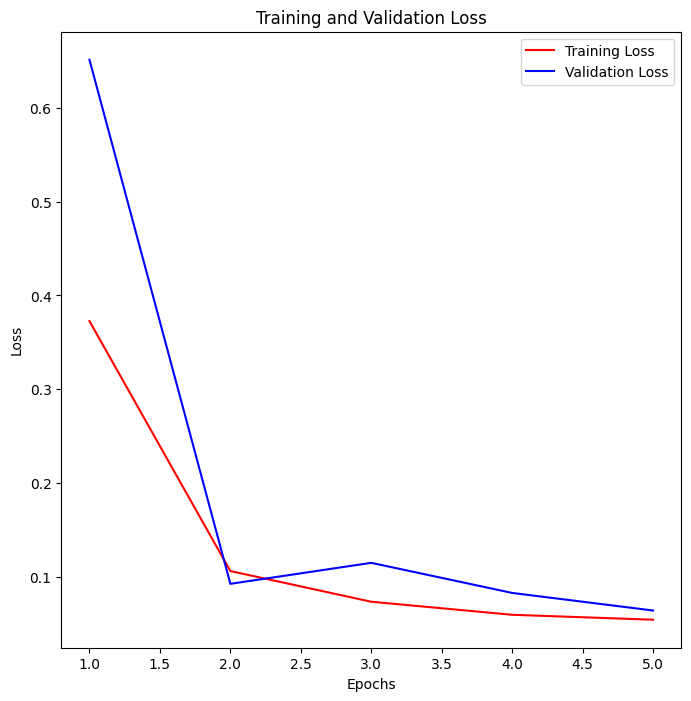

In [57]:
# plotting against train, validation loss

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see from both the figures, accuracy of the validation has been decreased even though the training accuracy is increasing after 4th Epochs.

But both the train and validation set's loss has almost same loss.

We can only use 4 epochs for this model to get the same accuracy as the training for the validation set.

## Task3:- Compare between various models and find the classifier that works better.

The basic Machine Learning Models like Support Vector Machine and K Nearest Neighbor also giving the best accuracy, We built CNN model for this problem because the dataset is image based.

After building CNN model and evaluating and predicting the Accuracy and Loss for both the dataset (train and test), we can achieve the highest accuracy of 98% within the 4 Epochs.

So, to conclude CNN model_new is giving the Generalized Model for this dataset, so we are going to save the file for further use.

## Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.

Like mentioned above, the best model after comparing all of them against each other, the model_new gave best results, like 98% accuracy and very less loss training only few epochs.

Based on that, we are saving the model for Production.

In [58]:
# Save the model
model_new.save('mnist_model.h5')

# another way of saving the model, since the above code gives a warning
model_new.save('my_model.keras')

In [59]:
# saving the file in pickle format for deployment purpose.

import pickle

# Save the model to a pickle file
filename = 'mnist_model.sav'
pickle.dump(model_new, open(filename, 'wb'))


## Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used with proper reason.


Challenges were like, Since the data is image dataset, I didn't have the computer resources to run smoothly and faster. I used Colab to overcome this challenge.

Even though the Colab is free, they were only proving the GPU access for limited period of time, couldn't use after sometime.

When it comes to data handling, the labels and images, plotting them against the training and validation loss, accuracy, and even printing few images were difficult for me.

Building SVC model took lot of time despite the colab free GPU usage.